# Health hackthon CMS data

In [5]:
import pandas as pd
import pymysql
import pandas.io.sql as sql

## Import data from sql using pymysql

### The data was stored temporarily in Amazon Web Services (AWS) - Cloud Computing Services

In [1]:
"""examples 
"""
# This code gives an example of how to use pandas to read
# one of the datasets into a dataframe

import pymysql
import pandas.io.sql as sql
import pandas as pd

# first connect to the database
cnxn = pymysql.connect(host='health-db-internet.c6clocfz5zxy.us-east-1.rds.amazonaws.com',
                       port=3306,
                       user='data_hacker',
                       passwd='hack_pw')

# For example, let's figure out how much each state paid in 2014 for Allopathic care
sql_command = \
'select distinct(d.Recipient_State), '\
    'avg(d.Total_Amount_of_Payment_USDollars) '\
    'from CMS_open_payments_2014.general_payment_data d '\
    'where d.Physician_Specialty like \'{}\' '\
        'group by d.Physician_Specialty, d.Recipient_State;'.format('%Allopathic%')

# This one line does it all!
print 'starting call to sql'
df = sql.read_sql(sql_command, cnxn)
print '\nfinished processing ask\n'

# now do your favorite pandas stuff..

starting call to sql

finished processing ask



### Table 1 is physician information
### This code gives an example of how to use pandas to read one of the datasets into a dataframe


In [4]:
import pymysql
import pandas.io.sql as sql
import pandas as pd

# first connect to the database
conn = pymysql.connect(host='health-db-internet.c6clocfz5zxy.us-east-1.rds.amazonaws.com',
                       port=3306,
                       user='data_hacker',
                       passwd='hack_pw')

# For example, let's figure out how much each state paid in 2014 for Allopathic care
sql_command = \
'select d.Record_ID, d.Physician_Profile_ID from CMS_open_payments_2014.general_payment_data d '                                                                                                                                        
# cleanup the zipcode to 5 digs      
# This one line does it all!
print 'starting call to sql'
print 'physician info'  
df_tb1 = sql.read_sql(sql_command,conn)
df_tb1[:5]
print '\nfinished processing ask\n'

starting call to sql
physician info

finished processing ask



#### Request the data from aws and preview the results 

##### Ideally, I would request the following columns from the dataframe in Amazon Web Services. However, my laptop is very slow and process  so many columns takes a very long time.  Here is the code anyway. 
##### select d.Record_ID, d.Physician_Profile_ID, d.Physician_First_Name, d.Physician_Last_Name, d.Recipient_Zip_Code, 
##### d.Physician_Primary_Type, d.Physician_Specialty, d.Recipient_State 
##### from CMS_open_payments_2014.general_payment_data d '\  

### Table 2 is about transaction information

In [6]:
# For example, let's figure out how much each state paid in 2014 for Allopathic care
sql_command = \
'select d.Record_ID, d.Physician_Profile_ID, d.Teaching_Hospital_ID, d.Total_Amount_of_Payment_USDollars, d.Third_Party_Equals_Covered_Recipient_Indicator, d.Date_of_Payment, d.Number_of_Payments_Included_in_Total_Amount,d.Form_of_Payment_or_Transfer_of_Value,d.Nature_of_Payment_or_Transfer_of_Value from CMS_open_payments_2014.general_payment_data d '                         
print 'transaction info'
print 'starting call to sql' 
df_tb2 = sql.read_sql(sql_command,conn)
print '\nfinished processing ask\n'

transaction info
starting call to sql

finished processing ask



### Table 3 is about hospital information

In [ ]:
# For example, let's figure out how much each state paid in 2014 for Allopathic care
sql_command = \
'select d.Record_ID, d.Recipient_State, d.Teaching_Hospital_ID, d.Recipient_Zip_Code, d.Teaching_Hospital_Name from CMS_open_payments_2014.general_payment_data d '

print 'hospital info'
print 'starting call to sql'
df_tb3 = sql.read_sql(sql_command,conn)
print '\nfinished processing ask\n'


### Table4: Manu/GPO info

"Record_ID"  
"Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name"
"Total_Amount_of_Payment_USDollars" 
"Physician_Ownership_Indicator"


### Table 5 is total amount of payment grouped by states

In [7]:
#which state get the most payment dollars
sql_command5 = \
'select d.Recipient_State, '\
    'sum(d.Total_Amount_of_Payment_USDollars)  '\
    'from CMS_open_payments_2014.general_payment_data d '\
        'group by d.Recipient_State'

print 'starting call to sql'
df_tb5 = sql.read_sql(sql_command5,conn)
print '\nfinished processing ask\n'

starting call to sql

finished processing ask



#### Preview dataframe 

In [18]:
df_tb5['sum(d.Total_Amount_of_Payment_USDollars)'][:5]

0     23621.12
1        29.51
2      2063.61
3      7449.37
4    740753.50
Name: sum(d.Total_Amount_of_Payment_USDollars), dtype: float64

### Save dataframe results to local for future plotting

In [3]:
df_tb4.to_csv("./Desktop/state_total_payment", sep='\t')

### Here I am going to use my local saved csv files and make some visualization plots with Seaborn and Bokeh.

In [5]:
import pandas as pd

df = pd.read_csv("./Desktop/state_total_payment", sep='\t')
df.columns = ["Index", "State","Total"]
df1=df[["State","Total"]]
df2=df1.sort(["Total","State"],ascending=[0, 0] )
data=df2
data.head()

,State,Total
10,CA,5.804968e+08
43,NY,2.276465e+08
54,TX,1.721102e+08
15,FL,1.364830e+08
27,MA,1.204375e+08


#### Use Matplotlib to plot the bar chart sorted by total payments

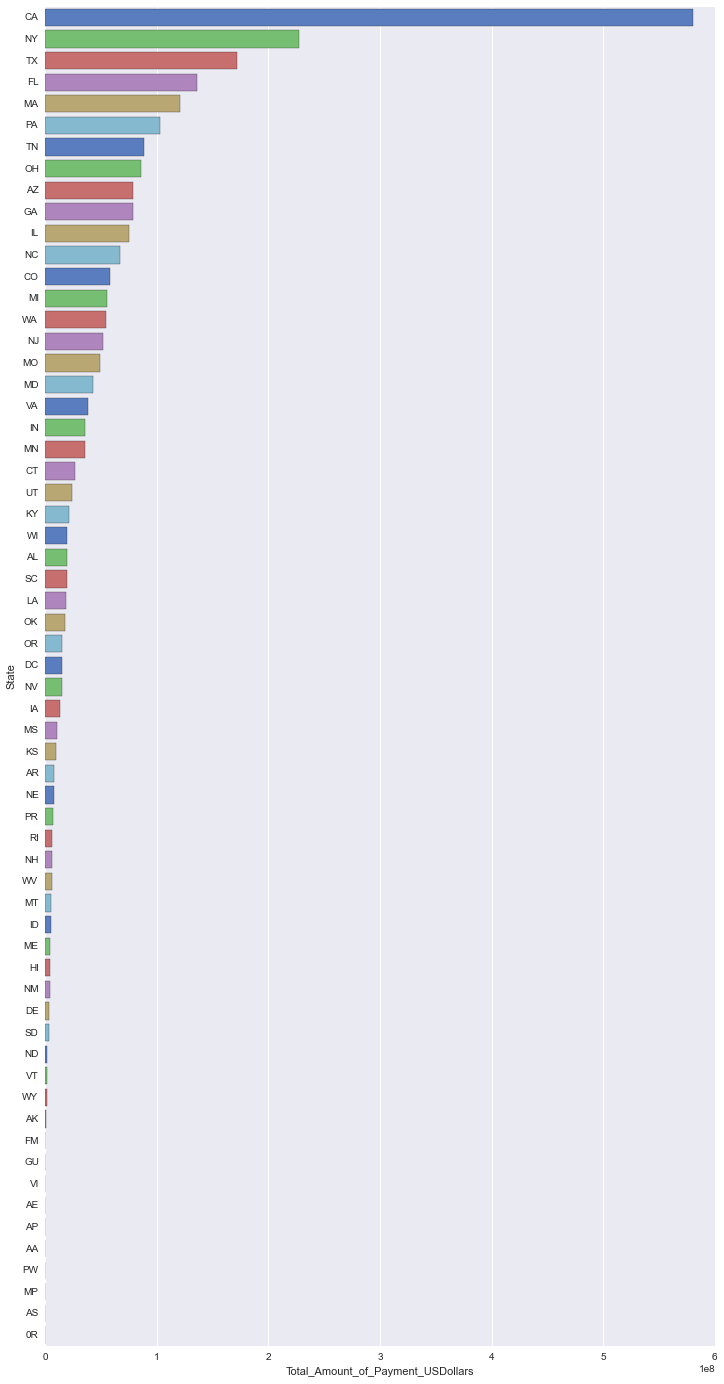

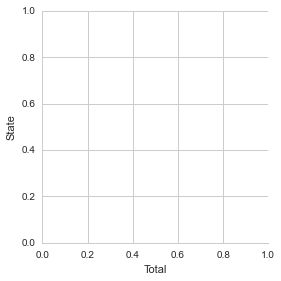

In [6]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Draw a barplot

fig = plt.figure()
fig.set_size_inches(12, 24)
ax = fig.add_subplot(111)

sns.set_color_codes("pastel")
sns.set(style="whitegrid")
sns.factorplot(y="State", x="Total",  data=data, kind="bar", palette="muted", ax=ax)

# Add a legend and informative axis label
ax.set(ylabel="State",
       xlabel="Total_Amount_of_Payment_USDollars")
sns.despine()

### Bokeh bar needs columns not null; so drop the nulls.
### Bokeh needs to explicitly list out the values to plot.

In [18]:
from bokeh._legacy_charts import Bar, output_file, show
from bokeh.plotting import figure, output_file, show
from bokeh.embed import notebook_div
from bokeh.embed import components

data=df2[:10]  #only get the top 10
total=data['Total'].astype(float).values
state=data['State'].values.tolist() 
#total

#### To make it simple, I only plot the top 10 states

In [25]:
output_file("bar.html")
plot = figure(plot_width=800, plot_height=800)
plot=Bar(total,state, title="Total Amount of Payment (USDs) of Top 10 States",xlabel="State",ylabel="Total Payment")
show(plot)
script, div = components(plot)
#print(script)
print(div)

<div class="plotdiv" id="7027c08c-eec1-4618-83e1-ce8b5fc057f8"></div>
/bin/sh: -c: line 0: syntax error near unexpected token `.Desktop/bar.png'
/bin/sh: -c: line 0: `[title](.Desktop/bar.png)'


In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./Desktop/bar.png")

# This part load big csv files from local downloaded files 

In [30]:
df1=pd.read_csv('./Desktop/data/OP_DTL_RSRCH_PGYR2014_P06302015.csv') #load Research payment data 
df2=pd.read_csv('./Desktop/data/OP_DTL_OWNRSHP_PGYR2014_P06302015.csv') #load ownership payment data 

In [41]:
#df1.ix[:3,:20]
list(df1.columns.values)

['Covered_Recipient_Type',
 'Noncovered_Recipient_Entity_Name',
 'Teaching_Hospital_ID',
 'Teaching_Hospital_Name',
 'Physician_Profile_ID',
 'Physician_First_Name',
 'Physician_Middle_Name',
 'Physician_Last_Name',
 'Physician_Name_Suffix',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Recipient_Primary_Business_Street_Address_Line2',
 'Recipient_City',
 'Recipient_State',
 'Recipient_Zip_Code',
 'Recipient_Country',
 'Recipient_Province',
 'Recipient_Postal_Code',
 'Physician_Primary_Type',
 'Physician_Specialty',
 'Physician_License_State_code1',
 'Physician_License_State_code2',
 'Physician_License_State_code3',
 'Physician_License_State_code4',
 'Physician_License_State_code5',
 'Principal_Investigator_1_Profile_ID',
 'Principal_Investigator_1_First_Name',
 'Principal_Investigator_1_Middle_Name',
 'Principal_Investigator_1_Last_Name',
 'Principal_Investigator_1_Name_Suffix',
 'Principal_Investigator_1_Business_Street_Address_Line1',
 'Principal_Investigator_1_Business_Stre

In [65]:
#split the table into two based on covered recipient type physican and teaching hostpital 
df_phys=df1[df1['Covered_Recipient_Type'].str.contains("Physician")]
df_tech_hos=df1[df1['Covered_Recipient_Type'].str.contains("Teaching")]

In [67]:
#df_phys[:5]
#df_tech_hos[:5]

In [42]:
#df2.ix[:3, :20]
list(df2.columns.values)

['Physician_Profile_ID',
 'Physician_First_Name',
 'Physician_Middle_Name',
 'Physician_Last_Name',
 'Physician_Name_Suffix',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Recipient_Primary_Business_Street_Address_Line2',
 'Recipient_City',
 'Recipient_State',
 'Recipient_Zip_Code',
 'Recipient_Country',
 'Recipient_Province',
 'Recipient_Postal_Code',
 'Physician_Primary_Type',
 'Physician_Specialty',
 'Record_ID',
 'Program_Year',
 'Total_Amount_Invested_USDollars',
 'Value_of_Interest',
 'Terms_of_Interest',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Dispute_Status_for_Publication',
 'Interest_Held_by_Physician_or_an_Immediate_Family_Member',
 'Payment_Publication_Date']